In [1]:
# This notebook will look at the outputs of scattering module and make some plots
# start with necessary includes

# using Plots, Plotly
using Plots
include("../modules/scattering.jl")


Main.scattering

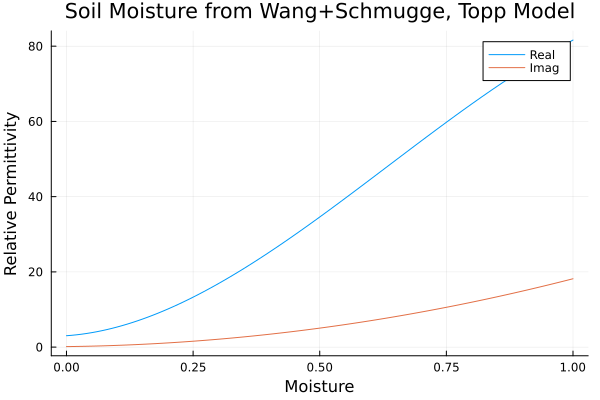

In [2]:
include("../modules/scattering.jl")
using Plots
# plot dielectric vs soil moisture
θᵥ = 0:.01:1
ϵ = scattering.soil_dielectric.(θᵥ)
ϵₒ = 8.854e-12
plot(θᵥ,real(ϵ)./ϵₒ,label="Real")
plot!(θᵥ,imag(ϵ)./ϵₒ,label="Imag")
plot!(title = "Soil Moisture from Wang+Schmugge, Topp Model", xlabel = "Moisture", ylabel = "Relative Permittivity",)

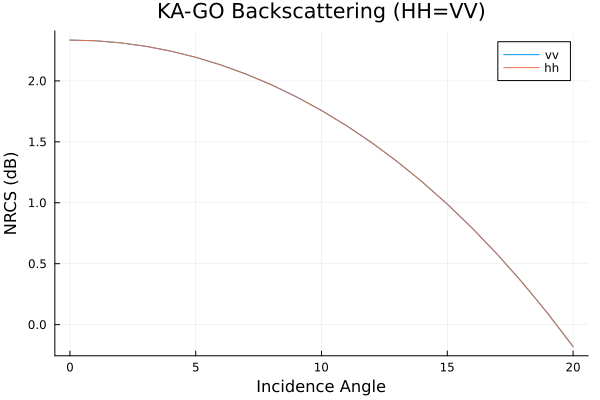

In [3]:
include("../modules/scattering.jl")
# plot BRCS of KA-GO in back scatter direction only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 1m correlation length?
σ = 1 # 2m RMS surface roughness
θ = 0:20

if λ*σ < l^2/2.76
    
    σʳ_vh,  σʳ_hv,  σʳ_vv,  σʳ_hh = scattering.BRCS_KA_backscatter(θ,σ,l,θᵥ)
else
    display("Doesn't meet surface criteria")
end
# plot(θ,σʳ_vh,label="vh")
# plot!(θ,σʳ_hv,label="hv")
plot(θ,10*log10.(σʳ_vv),label="vv")
plot!(θ,10*log10.(σʳ_hh),label="hh")
plot!(title = "KA-GO Backscattering (HH=VV)", xlabel = "Incidence Angle", ylabel = "NRCS (dB)")

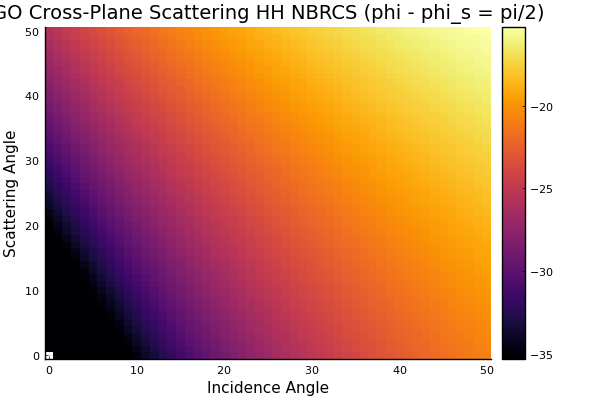

In [36]:
# import Pkg; Pkg.add("PyPlot")
pyplot()
include("../modules/scattering.jl")
# plot BRCS of KA-GO in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 1m correlation length?
σ = 2 # 2m RMS surface roughness
θᵢ = 0:50
θₛ = 0:50
ϕ = 0
ϕₛ = 90

N = length(θᵢ)
M = length(θₛ)
σʳ_vh = zeros(N,M)
σʳ_hv = zeros(N,M)
σʳ_vv = zeros(N,M)
σʳ_hh = zeros(N,M)
if λ*σ < l^2/2.76
    for i = 1 :N
        for j = 1 : M
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = scattering.BRCS_KA.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,σ,l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
# plot(θ,σʳ_vh,label="vh")
# plot!(θ,σʳ_hv,label="hv")
# plot!(θ,σʳ_vv,label="vv")
# plot!(θ,σʳ_hh,label="hh")
# plot!(title = "KA-GO Scattering", xlabel = "Incidence Angle", ylabel = "NBRCS")

# heatmap(θᵢ,θₛ,σʳ_vv,xlabel="Incidence Angle",ylabel="Scattering Angle",title="GO Cross-Plane Scattering VV NBRCS (phi - phi_s = pi/2)")
peak_value = maximum(10*log10.(σʳ_hh[:]))
heatmap(θᵢ,θₛ,10*log10.(σʳ_hh),xlabel="Incidence Angle",ylabel="Scattering Angle",
    title="GO Cross-Plane Scattering HH NBRCS (phi - phi_s = pi/2)",clim=(peak_value-20, peak_value))


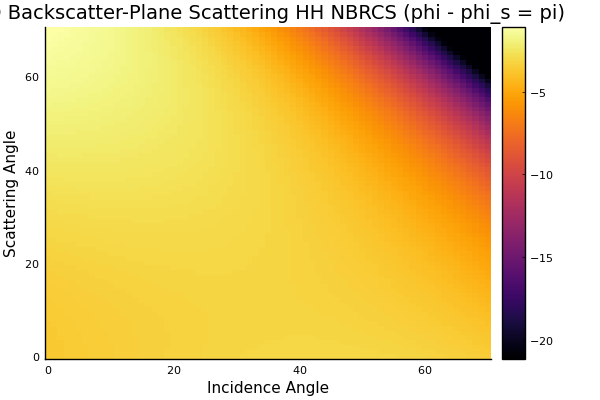

In [37]:
include("../modules/scattering.jl")
# plot BRCS of KA-GO in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 5m correlation length?
σ = 2 # 2m RMS surface roughness
θᵢ = 0:70
θₛ = 0:70 
ϕ = 0
ϕₛ = 180

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = scattering.BRCS_KA.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,σ,l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end

# peak_value = 10*log10(maximum(σʳ_vv))
# heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
# xlabel="Incidence Angle",ylabel="Scattering Angle",
# title="GO Backscatter-Plane Scattering VV NBRCS (phi - phi_s = pi)",
# clim=(peak_value-20, peak_value))


peak_value = 10*log10(maximum(σʳ_hh))
heatmap(θᵢ, θₛ, 10*log10.(σʳ_hh),
xlabel="Incidence Angle",ylabel="Scattering Angle",
title="GO Backscatter-Plane Scattering HH NBRCS (phi - phi_s = pi)",
clim=(peak_value-20, peak_value))

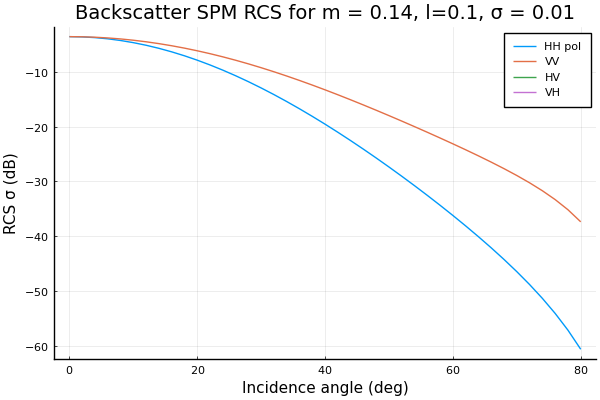

In [6]:
include("../modules/scattering.jl")
## testing the backscattering sections of the code 
λ = 25e-2
# k = 2*pi/λ
θ_vec = 0:2:80
nθ = length(θ_vec)
l = .1
σ = λ/25
m = sqrt(2)*σ/l
m = round(m; digits=2)
θᵥ = 0.2

BRCS_table_vh = Array{Float64, 1}(undef, nθ)
BRCS_table_hv = Array{Float64, 1}(undef, nθ)
BRCS_table_vv = Array{Float64, 1}(undef, nθ)
BRCS_table_hh = Array{Float64, 1}(undef, nθ)
for i = 1 : nθ
    σʳ_vh,  σʳ_hv,  σʳ_vv,  σʳ_hh  = scattering.BRCS_SPM_backscatter(λ,θ_vec[i],l,σ,θᵥ)
    BRCS_table_vh[i] = 10*log10.(σʳ_vh)
    BRCS_table_hv[i] = 10*log10.(σʳ_hv)
    BRCS_table_vv[i] = 10*log10.(σʳ_vv)
    BRCS_table_hh[i] = 10*log10.(σʳ_hh)
end
plot(θ_vec, BRCS_table_hh,label="HH pol")
plot!(θ_vec, BRCS_table_vv,label="VV")
plot!(θ_vec, BRCS_table_hv,label="HV")
plot!(θ_vec, BRCS_table_vh,label= "VH")
xlabel!("Incidence angle (deg)")
ylabel!("RCS σ (dB)")
title!("Backscatter SPM RCS for m = $m, l=$l, σ = $σ")

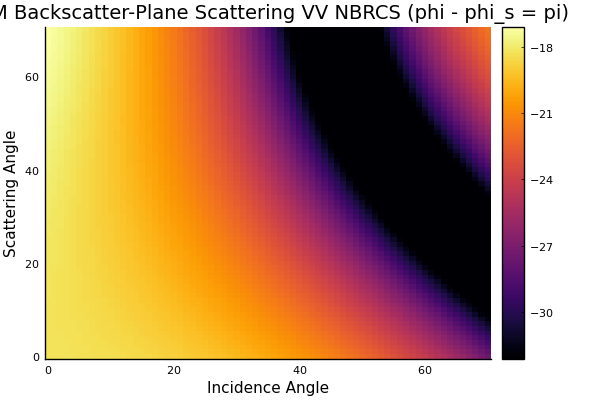

In [52]:
include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = .1
λ = 25e-2
σ = λ/20
m = sqrt(2)*σ/l
m = round(m; digits=2)
ϕ = 0
ϕₛ = 0
θᵢ = 0:70
θₛ = 0:70 

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,l,σ,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end


peak_value = 10*log10(maximum(σʳ_vv))
heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
xlabel="Incidence Angle",ylabel="Scattering Angle",
title="SPM Backscatter-Plane Scattering VV NBRCS (phi - phi_s = pi)",
clim=(peak_value-15, peak_value))

# peak_value = 10*log10(maximum(σʳ_hh))
# heatmap(θᵢ, θₛ, 10*log10.(σʳ_hh),
# xlabel="Incidence Angle",ylabel="Scattering Angle",
# title="SPM Backscatter-Plane Scattering HH NBRCS (phi - phi_s = pi)",
# clim=(peak_value-5, peak_value))

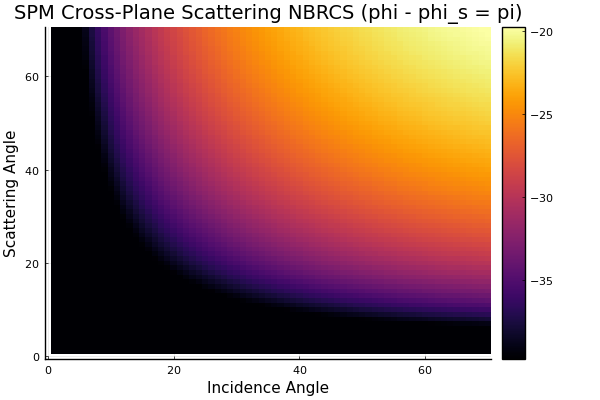

In [53]:
include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = .1
λ = 25e-2
σ = λ/25
m = sqrt(2)*σ/l
m = round(m; digits=2)
ϕ = 0
ϕₛ = 90

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,l,σ,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end

peak_value1 = 10*log10(maximum(σʳ_vv))
# peak_value2 = 10*log10(maximum(σʳ_hh))
# peak_value3 = 10*log10(maximum(σʳ_vh))
# peak_value4 = 10*log10(maximum(σʳ_hv))

 heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
    xlabel="Incidence Angle",ylabel="Scattering Angle",
    title="SPM Cross-Plane Scattering NBRCS (phi - phi_s = pi)",
    clim=(peak_value1-20, peak_value1))




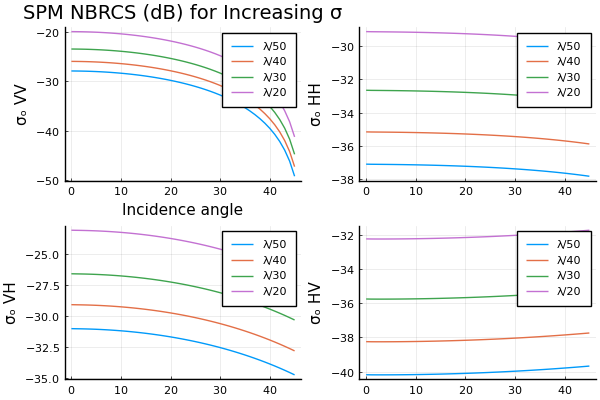

In [43]:
include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = .1
λ = 25e-2
σ = λ .* [1/50 1/40 1/30 1/20]
m = sqrt(2).*σ./l
ϕ  = 0 #15
ϕₛ = 35
θₛ = 45
θᵢ = 0:45

σʳ_vh = zeros(length(θᵢ),length(σ))
σʳ_hv = zeros(length(θᵢ),length(σ))
σʳ_vv = zeros(length(θᵢ),length(σ))
σʳ_hh = zeros(length(θᵢ),length(σ))
if λ*σ[end] < l^2/2.76
    for i = 1 : length(θᵢ)
        for j = 1 : length(σ)
            θₛ = θᵢ[i]
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ,ϕₛ,l,σ[j],θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
l = @layout [a b; c d]
p1 = plot(θᵢ, 10 *log10.(σʳ_vv),label=["λ/50" "λ/40" "λ/30" "λ/20"])
title!("SPM NBRCS (dB) for Increasing σ")
xlabel!("Incidence angle")
ylabel!("σₒ VV")
p2 = plot(θᵢ, 10 *log10.(σʳ_hh),label=["λ/50" "λ/40" "λ/30" "λ/20"])
ylabel!("σₒ HH")
p3 = plot(θᵢ, 10 *log10.(σʳ_vh),label=["λ/50" "λ/40" "λ/30" "λ/20"])
ylabel!("σₒ VH")
p4 = plot(θᵢ, 10 *log10.(σʳ_hv),label=["λ/50" "λ/40" "λ/30" "λ/20"])
ylabel!("σₒ HV")
plot(p1, p2, p3, p4, layout = l)



In [ ]:
## working to generate plots to compare to results in U Kansas powerpoint